# [IMDB Movie Review Dataset Exploration with Word Tagging](https://www.kaggle.com/utathya/imdb-review-dataset)

In [1]:
# Loading required Libraries:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
% matplotlib inline

import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alok\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alok\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Reading Data:
imdb = pd.read_csv('D:/CRITICAL/New_Desktop/imdb_master.csv', encoding='latin-1', index_col=0)
#imdb = imdb_review_dataset.drop(['id'], axis=1)
imdb.head()

,type,review,label,file
0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [3]:
# Getting rid of unnecessary records & then features:
imdb = imdb[imdb.label != 'unsup']
imdb['sentiment'] = imdb.label.map({'neg': 0, 'pos': 1})
imdb.drop(['type', 'file', 'label'], axis=1, inplace=True)
imdb.head()

,review,sentiment
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


In [4]:
print(f"There are {imdb.shape[0]} observations and {imdb.shape[1]} features in our IMDB Master dataset.")
imdb.groupby('sentiment').describe().head()

There are 50000 observations and 2 features in our IMDB Master dataset.


review                                                            \
           count unique                                                top   
sentiment                                                                    
0          25000  24698  Nickelodeon has gone down the toilet. They hav...   
1          25000  24884  Loved today's show!!! It was a variety and not...   

                
          freq  
sentiment       
0            3  
1            5

In [5]:
# Iterating over each reviews and collecting them:
text = ' '.join(rev for rev in imdb.review)
print (f'There are {len(text)} words in the combination of all reviews.')

There are 65533507 words in the combination of all reviews.


In [6]:
# Preparing for corpus cleansing:
stop_words = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer()

In [7]:
# Pre-processing review content:
def clean_review(text):
    text = re.sub(r'[^\w\s]','',text, re.UNICODE)
    text = text.lower()
    text = [lemmatizer.lemmatize(token) for token in text.split(' ')]
    text = [lemmatizer.lemmatize(token, 'v') for token in text]
    text = [word for word in text if not word in stop_words]
    text = ' '.join(text)
    return text

# Adding new column with refined reviews:
imdb['cleansed_reviews'] = imdb.review.apply(lambda x: clean_review(x))
imdb.head()

,review,sentiment,cleansed_reviews
0,Once again Mr. Costner has dragged out a movie...,0,mr costner ha drag movie far longer necessary ...
1,This is an example of why the majority of acti...,0,example majority action film generic bore real...
2,"First of all I hate those moronic rappers, who...",0,first hate moronic rapper couldnt act gun pres...
3,Not even the Beatles could write songs everyon...,0,even beatles could write song everyone like al...
4,Brass pictures (movies is not a fitting word f...,0,brass picture movie fit word really somewhat b...


There are 42450253 words in the combination of all reviews. 
[INFO] Loading Word Cloud for Cleansed Reviews...


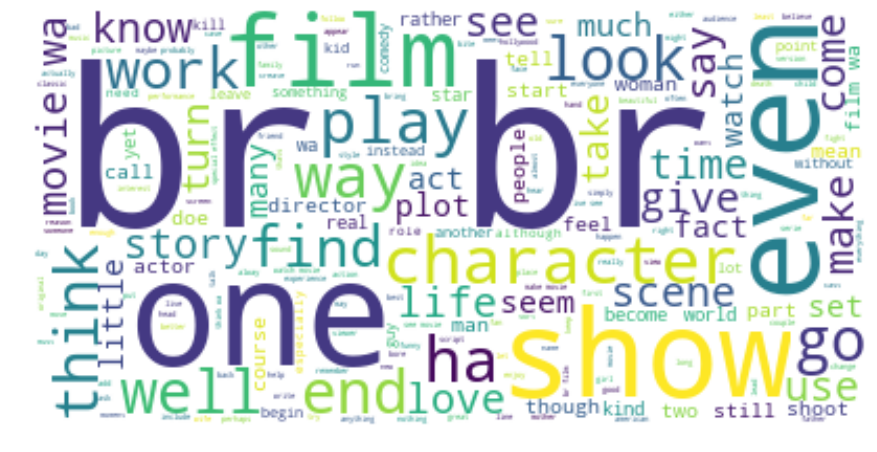

In [8]:
text = ' '.join(rev for rev in imdb.cleansed_reviews)
print (f"There are {len(text)} words in the combination of all reviews. \n[INFO] Loading Word Cloud for Cleansed Reviews...")

# Second level check for Stopwords:
sw = set(STOPWORDS)

# Generate a word cloud image
wc = WordCloud(stopwords=sw, background_color='white').generate(text)

# Plot generation:
plt.figure(figsize=[15,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
#plt.savefig('review_cloud.png', format='png')
plt.show()